In [1]:
from pyrootmemo.rbmw import Rbmw
from pyrootmemo.materials import MultipleRoots
from pyrootmemo.tools.helpers import units
import numpy as np

In [2]:
# generate some root data
from collections import namedtuple
Parameter = namedtuple("parameter", "value unit")
Roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([1, 2, 1, 3, 4, 5, 6, 3], 'mm'),
    tensile_strength = Parameter([40, 30, 40, 20, 10, 5, 20, 10], 'MPa'),
    elastic_modulus = Parameter([100, 100, 100, 100, 100, 100, 20, 100], 'MPa'),
    length = Parameter([1, 1, 1, 1, 1, 1, 1, 1], 'm')
)

In [3]:
a = np.array([1,2,3]) * units('mm')
b = np.array([1,2,3]) * units('mm')
c = np.array([[1,2,3],[1,2,3]]) * units('mm')
a[np.newaxis,:] * b[:,np.newaxis]
(a * b)[:, np.newaxis]
displacement = 0.011 * units('mm')
print(np.isscalar(displacement.magnitude))
print(np.array([displacement.magnitude]) * displacement.units)
print(np.sum(c))

True
[0.011] millimeter
12 millimeter


In [4]:
# create FBM object
rbmw = Rbmw(Roots, weibull_shape = 4.)

62.3763221370253 megapascal * millimeter ** 3 / meter
[0.8639379797371931 3.4557519189487724 0.8639379797371931 7.7754418176347375 13.823007675795088 21.598449493429793 6.22035345410779 7.775441817634737] megapascal * millimeter ** 3 / meter
[56.70574739729574 113.41149479459082] megapascal * millimeter ** 3 / meter
[[0.7853981633974483 3.141592653589793 0.7853981633974483  7.0685834705770345 12.56637061435917 19.634954084936187  5.654866776461628 7.068583470577034] [1.5707963267948966 6.283185307179586 1.5707963267948966  14.137166941154067 25.132741228718317 39.269908169871734  11.309733552923255 14.137166941154053]] megapascal * millimeter ** 3 / meter
(<Quantity(343.575035, 'megapascal * millimeter ** 2')>, <Quantity(0.779971487, 'meter')>)
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0] [14.56172139792007 53.890844952512005 14.56172139792007  76.39768997797901 0.02415225583330892 3.7737899739481345e-62  108.58509461112146 0.013585643906236266] [16.97726443955089 19.579619507219764 16.977264439

(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Displacement [mm]', ylabel='Total force in root bundle [kN]'>)

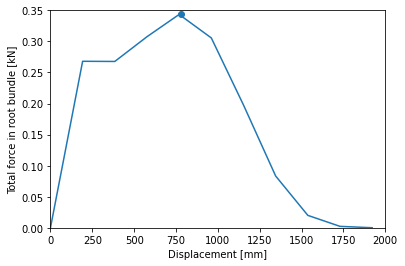

In [ ]:
# Test object
displacement1 = 0.011 * units('mm')
displacement2 = np.array([0.01, 0.02]) * units('mm')
f11 = rbmw.force(displacement1, total = True)
f12 = rbmw.force(displacement1, total = False)
f21 = rbmw.force(displacement2, total = True)
f22 = rbmw.force(displacement2, total = False)
print(f11)
print(f12)
print(f21)
print(f22)
print(rbmw.peak_force())
rbmw.plot(xunit = 'mm', yunit = 'kN', n = 251, fraction = 0.8)
